<a href="https://colab.research.google.com/github/Nancy727/Iris-Species-Visualization/blob/main/logisticRegressionIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to apply Logistic Regression on the Iris dataset and see how well it classifies using hyperparameter tuning.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df=load_iris()
data=pd.DataFrame(df.data,columns=df.feature_names)
data['target']=df.target
data=data[data['target']!=0]#Removed Setosa (target = 0),and  keept only Versicolor (1) and Virginica (2)
data['target']=data['target'].replace({1:0,2:1})# Converted target labels: Versicolor (1) -> 0, Virginica (2) -> 1
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


Data Preprocessing,
Splitting data into Independent and Dependent variables

In [ ]:
x=data.drop(columns=['target'])
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Applying Logistics Regression with GridSearchCV

In [ ]:
param_grid={'C':np.logspace(-3,3,10),'solver':['lbfgs','liblinear']}
grid=GridSearchCV(LogisticRegression(max_iter=500),param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

Model Prediction

In [ ]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9625


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)

Accuracy: 0.9625
Confusion Matrix:
[[40  2]
 [ 1 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.95      0.97      0.96        38

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



Heat Map

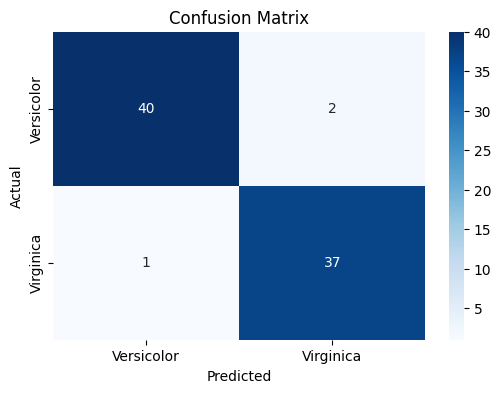

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Versicolor', 'Virginica'],
            yticklabels=['Versicolor', 'Virginica'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


PairPlot

Pairplot only for Versicolor vs Virginica


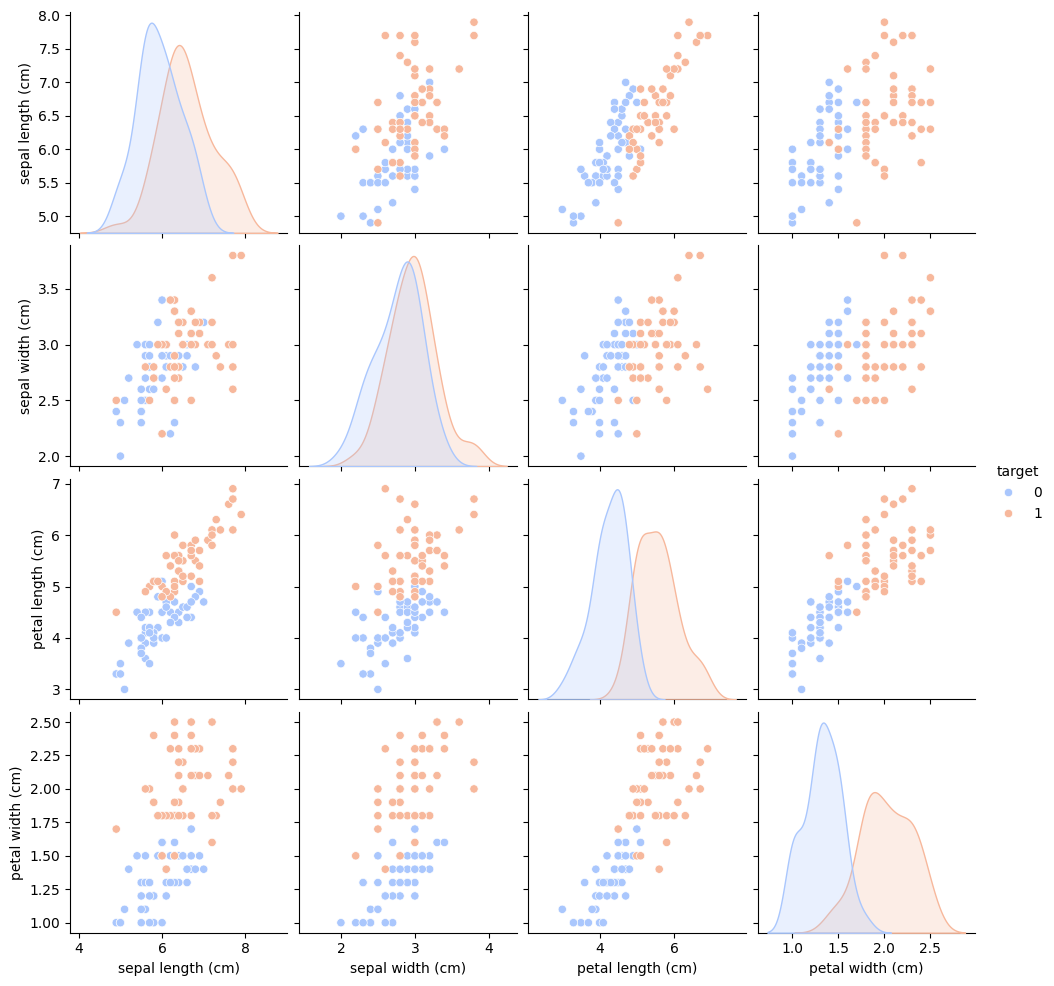

In [ ]:
sns.pairplot(data, hue='target', palette='coolwarm')
print("Pairplot only for Versicolor vs Virginica")
plt.show()

Box Plot

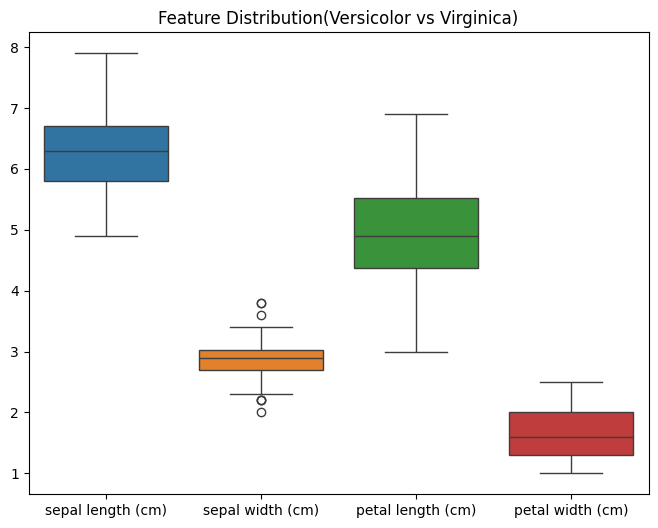

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=x)
plt.title("Feature Distribution(Versicolor vs Virginica)")
plt.show()


Feature Density using Violin Plot

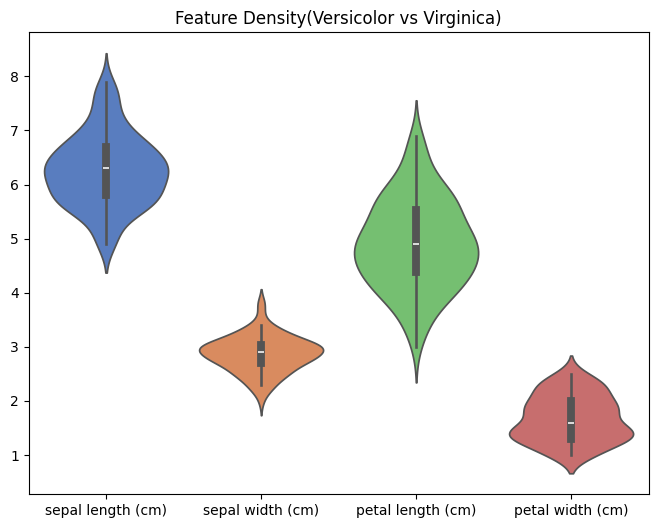

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=x, palette='muted')
plt.title("Feature Density(Versicolor vs Virginica)")
plt.show()


Distribution Plot for each feature

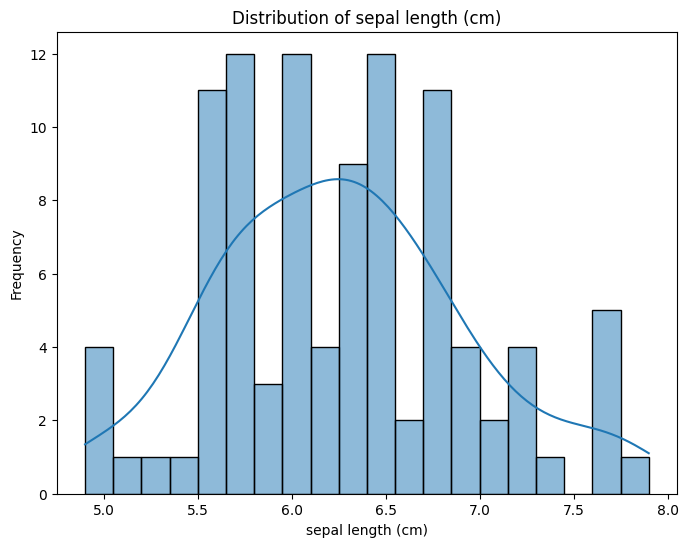

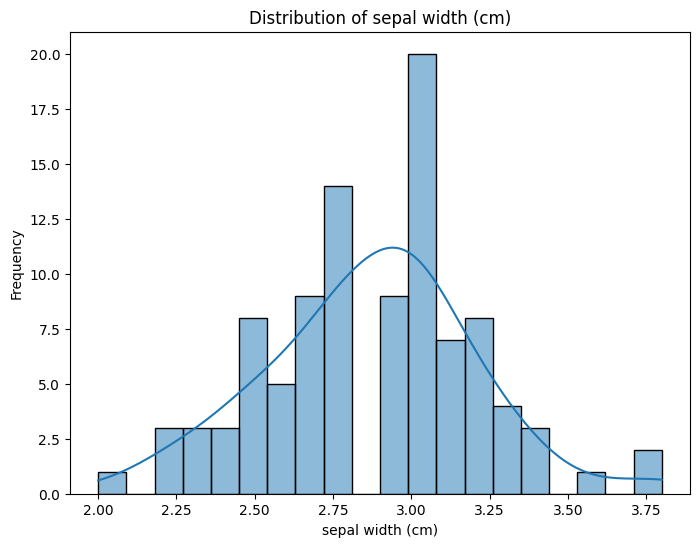

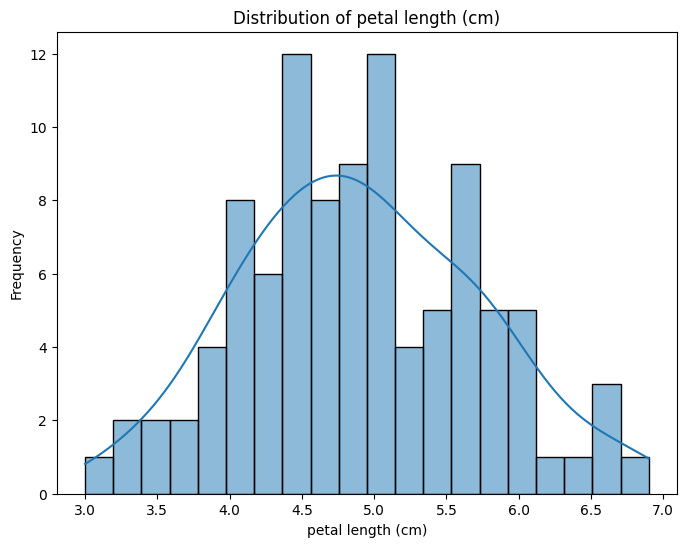

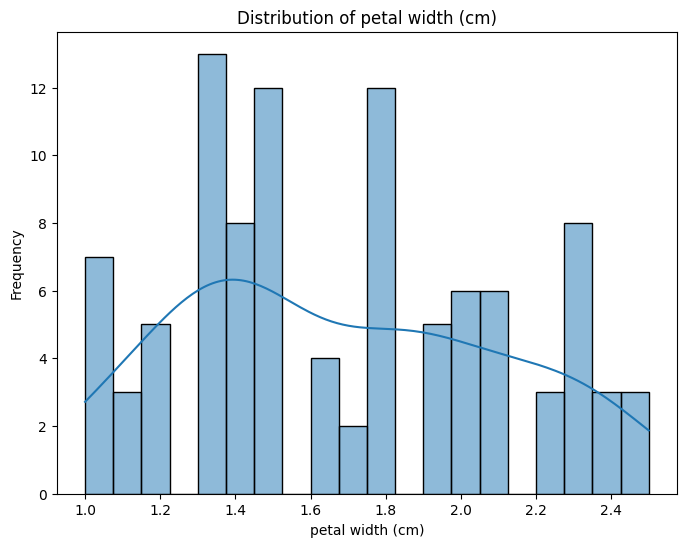

In [ ]:
for col in x.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(x[col],kde=True,bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Coorelation Heatmap

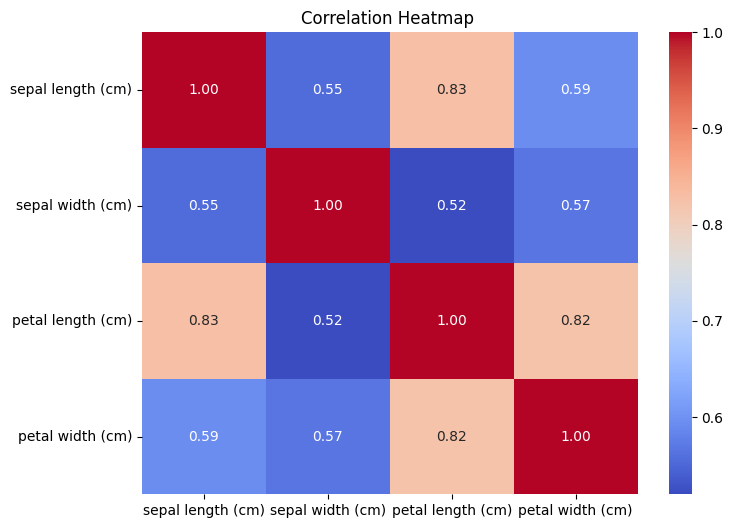

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap ")
plt.show()


In [ ]:
print("Best Parameters:", grid.best_params_)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", class_report)


Best Parameters: {'C': np.float64(0.46415888336127775), 'solver': 'liblinear'}
Accuracy Score: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.95      0.97      0.96        38

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



 Conclusion:

1)The logistic regression model was successfully trained and evaluated on the Iris dataset


2)After applying GridSearchCV for hyperparameter tuning, the best model was selected, achieving high accuracy.


3)The confusion matrix, classification report, and various visualizations indicate the effectiveness of logistic regression for this binary classification task.


4) The removal of Setosa ensured a proper binary classification problem, making the results more interpretable and focused.
